In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [7]:
df  = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.sample(5)

,Survived,Age,Fare
126,0,NaN,7.7500
680,0,NaN,8.1375
369,1,24.0,69.3000
863,0,NaN,69.5500
597,0,49.0,0.0000


In [8]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [9]:
df['Age'].fillna(df['Age'].mean(),inplace = True)

In [13]:
X = df[['Age','Fare']]
Y = df['Survived']

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2,random_state = 2)

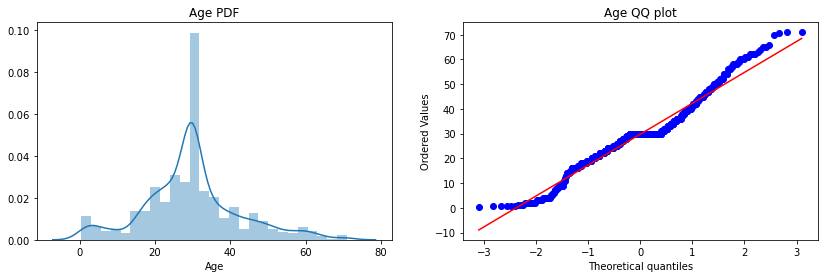

In [31]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')



plt.subplot(122)
stats.probplot(X_train['Age'], dist = 'norm', plot = plt)
plt.title('Age QQ plot')

plt.show()

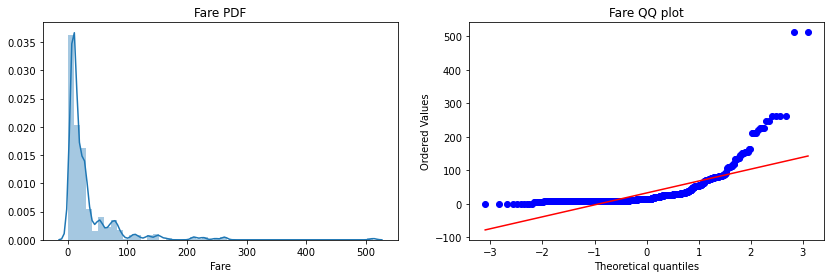

In [32]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')



plt.subplot(122)
stats.probplot(X_train['Fare'], dist = 'norm', plot = plt)
plt.title('Fare QQ plot')

plt.show()

In [37]:
lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()


In [40]:
lr_clf.fit(X_train,Y_train)
dt_clf.fit(X_train,Y_train)

y_pred_lr = lr_clf.predict(X_test)
y_pred_dt = dt_clf.predict(X_test)


lr_score = accuracy_score(y_pred_lr,Y_test)
dt_score = accuracy_score(y_pred_dt,Y_test)
lr_score,dt_score

(0.6145251396648045, 0.6201117318435754)

# Applying transformer (log transformer )

In [41]:
trf = FunctionTransformer(func=np.log1p)

In [42]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

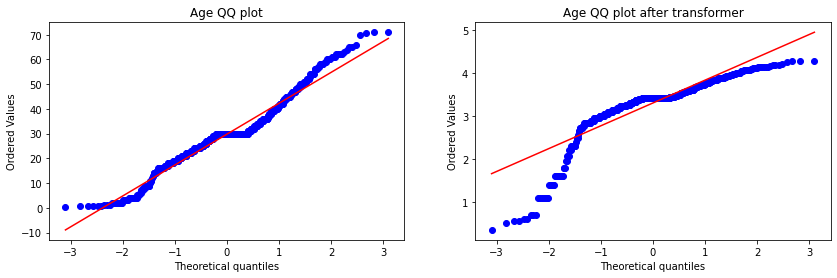

In [44]:
plt.figure(figsize = (14,4))
plt.subplot(121)
stats.probplot(X_train['Age'], dist = 'norm', plot = plt)
plt.title('Age QQ plot')


plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist = 'norm', plot = plt)
plt.title('Age QQ plot after transformer')

plt.show()

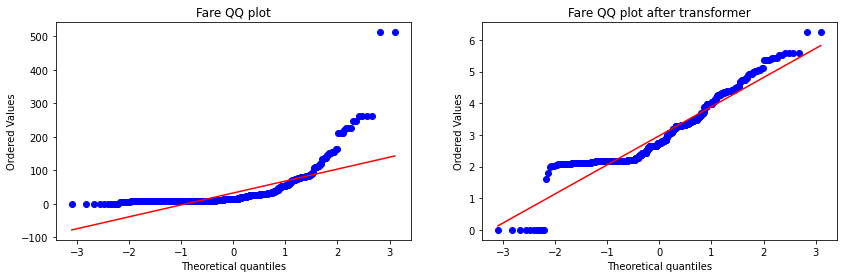

In [45]:
plt.figure(figsize = (14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'], dist = 'norm', plot = plt)
plt.title('Fare QQ plot')


plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist = 'norm', plot = plt)
plt.title('Fare QQ plot after transformer')

plt.show()

In [49]:
lr_clf.fit(X_train,Y_train)
dt_clf.fit(X_train,Y_train)

y_pred_lr = lr_clf.predict(X_test)
y_pred_dt = dt_clf.predict(X_test)


lr_score = accuracy_score(y_pred_lr,Y_test)
dt_score = accuracy_score(y_pred_dt,Y_test)
lr_score,dt_score

(0.6145251396648045, 0.5977653631284916)

# Custom function

In [51]:
def apply_transform(transform):
    pass